Correlation Matrix Calculated:
                          Price Per Unit  Quantity  Total Spent  \
Price Per Unit                  1.000000  0.011801     0.630902   
Quantity                        0.011801  1.000000     0.712069   
Total Spent                     0.630902  0.712069     1.000000   
Category_Encoded                0.028030 -0.002075     0.012474   
Location_Encoded                0.004989  0.007966     0.008234   
Payment_Method_Encoded          0.006562  0.003389     0.009049   
Discount_Applied_Numeric        0.003162 -0.008342     0.002847   

                          Category_Encoded  Location_Encoded  \
Price Per Unit                    0.028030          0.004989   
Quantity                         -0.002075          0.007966   
Total Spent                       0.012474          0.008234   
Category_Encoded                  1.000000         -0.010998   
Location_Encoded                 -0.010998          1.000000   
Payment_Method_Encoded           -0.002116      

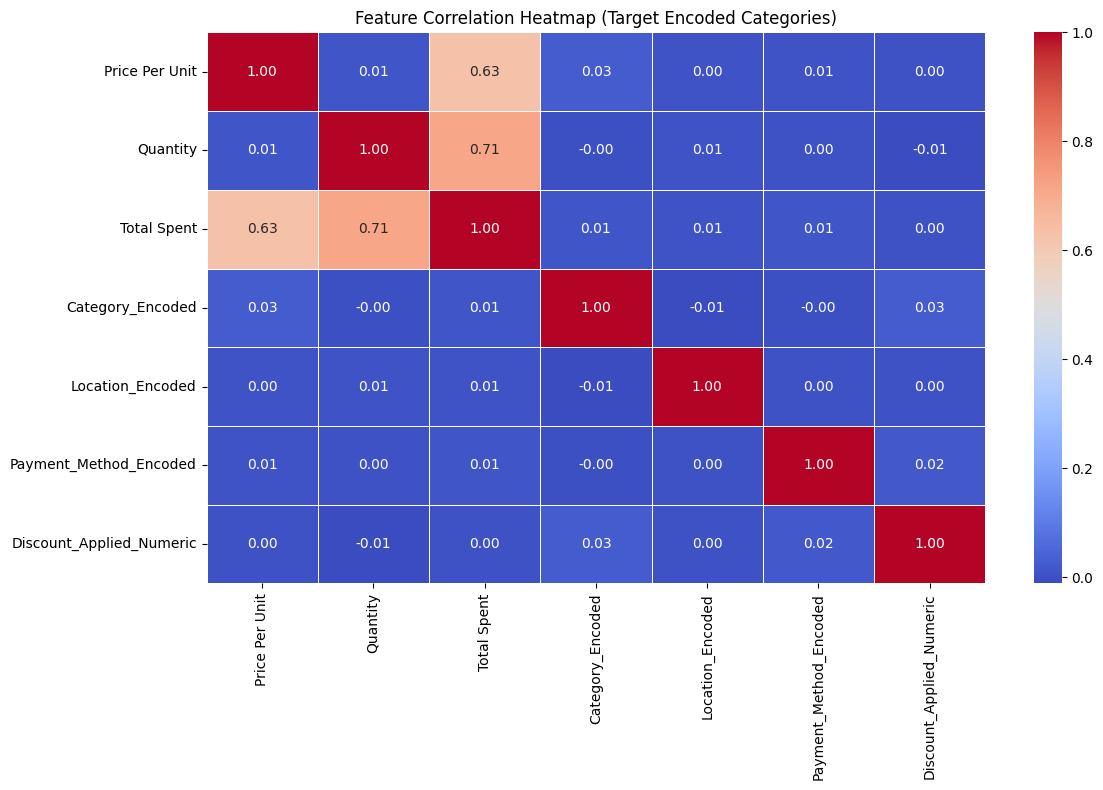

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('retail_store_sales.csv')

# 2. Pre-processing for Correlation
# Fill missing sales data to ensure numerical columns are complete
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit'] * df['Quantity'])

# Encode Target (Y): Discount Applied
# We treat 'True' as 1 and 'False' as 0. We drop NaNs for correlation calculation.
df['Discount_Applied_Numeric'] = df['Discount Applied'].map({'True': 1, 'False': 0, True: 1, False: 0})

# Encode Category (X): Using Target Encoding (Discount Probability)
category_map = df.groupby('Category')['Discount_Applied_Numeric'].mean()
df['Category_Encoded'] = df['Category'].map(category_map)

# Encode Location (X): Binary Label Encoding
df['Location_Encoded'] = df['Location'].map({'Online': 1, 'In-store': 0})

# Encode Payment (X): Target Encoding (Probability of discount per payment method)
payment_map = df.groupby('Payment Method')['Discount_Applied_Numeric'].mean()
df['Payment_Method_Encoded'] = df['Payment Method'].map(payment_map)

# 3. Select features for Correlation Matrix
# We include both original quantitative and our new encoded categorical features
features_to_correlate = [
    'Price Per Unit',
    'Quantity',
    'Total Spent',
    'Category_Encoded',
    'Location_Encoded',
    'Payment_Method_Encoded',
    'Discount_Applied_Numeric'
]

corr_matrix = df[features_to_correlate].corr()

# 4. Generate Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap (Target Encoded Categories)')
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')

print("Correlation Matrix Calculated:")
print(corr_matrix)

# Target Distribution Analysis

Target Class Distribution:
Discount Applied
True     4219
NaN      4199
False    4157
Name: count, dtype: int64


/tmp/ipython-input-3117743170.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index.astype(str), y=target_counts.values, palette='viridis')


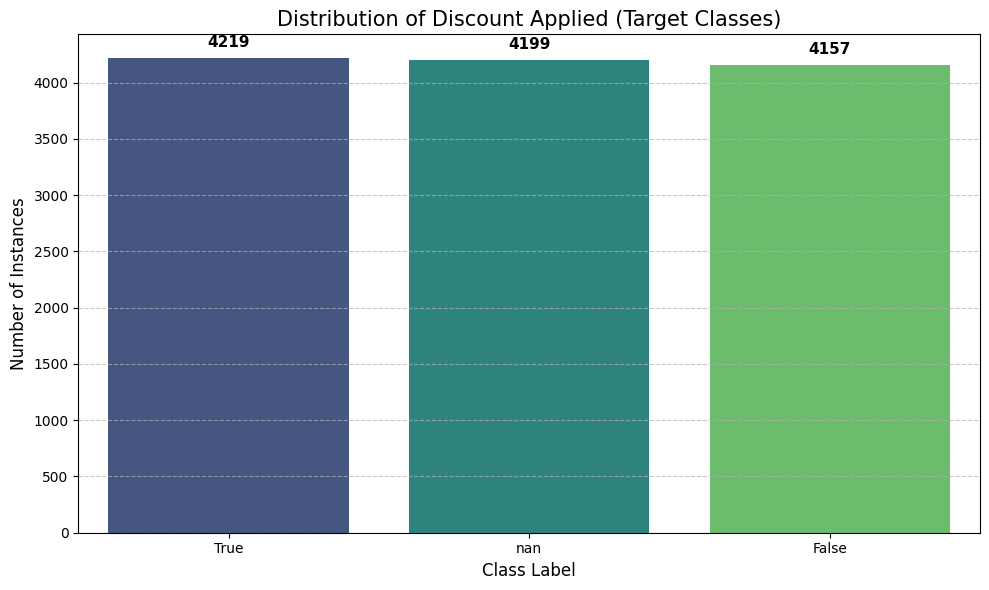

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('retail_store_sales.csv')

# 2. Count instances per class
# We include the 'NaN' values as a separate category since they represent a large portion
target_counts = df['Discount Applied'].value_counts(dropna=False)

# 3. Print the numerical breakdown
print("Target Class Distribution:")
print(target_counts)

# 4. Generate the Bar Chart for N classes
# In this dataset, N=3 (True, False, and Missing/NaN)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index.astype(str), y=target_counts.values, palette='viridis')

# Styling the chart
plt.title('Distribution of Discount Applied (Target Classes)', fontsize=15)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of bars
for i, value in enumerate(target_counts.values):
    plt.text(i, value + 100, str(value), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution_chart.png')
plt.show()